In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [6]:
dataset_path = "dataset/dataset_segmentasi_proposal.csv"

df = pd.read_csv(dataset_path)

df.head()

,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,parsing_status
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,Success
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,Success
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,Success
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",Success
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",Partial


## 1. Informasi Dataset

In [7]:
# Info dasar dataset
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nNama kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
print("\n" + "=" * 50)
df.info()

INFORMASI DATASET
Jumlah baris: 50
Jumlah kolom: 11

Nama kolom:
1. id_segmentasi
2. id_tenant
3. txt_latar_belakang
4. txt_noble_purpose
5. txt_konsumen
6. txt_produk_inovatif
7. txt_strategi_pemasaran
8. txt_sumber_daya
9. txt_keuangan_narrative
10. txt_rab_narrative
11. parsing_status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_segmentasi           50 non-null     int64 
 1   id_tenant               50 non-null     int64 
 2   txt_latar_belakang      50 non-null     object
 3   txt_noble_purpose       50 non-null     object
 4   txt_konsumen            50 non-null     object
 5   txt_produk_inovatif     50 non-null     object
 6   txt_strategi_pemasaran  50 non-null     object
 7   txt_sumber_daya         50 non-null     object
 8   txt_keuangan_narrative  50 non-null     object
 9   txt_rab_narrative       50 non

In [8]:
# Cek missing values
print("=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame(
    {
        "Kolom": missing.index,
        "Missing Count": missing.values,
        "Persentase (%)": missing_pct.values,
    }
)
missing_df = missing_df[missing_df["Missing Count"] > 0].sort_values(
    "Missing Count", ascending=False
)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✅ Tidak ada missing values!")

MISSING VALUES
✅ Tidak ada missing values!


## 2. Analisis Panjang Teks

In [9]:
# Identifikasi kolom teks (kolom yang berisi bagian proposal)
text_columns = [col for col in df.columns if col.startswith("txt_")]

print(f"Kolom teks yang ditemukan: {len(text_columns)}")
print("\nDaftar kolom teks:")
for i, col in enumerate(text_columns, 1):
    print(f"{i}. {col}")

Kolom teks yang ditemukan: 8

Daftar kolom teks:
1. txt_latar_belakang
2. txt_noble_purpose
3. txt_konsumen
4. txt_produk_inovatif
5. txt_strategi_pemasaran
6. txt_sumber_daya
7. txt_keuangan_narrative
8. txt_rab_narrative


In [10]:
# Hitung panjang karakter dan kata untuk setiap kolom teks
length_stats = []

for col in text_columns:
    # Hitung panjang karakter
    df[f"{col}_len_char"] = df[col].fillna("").astype(str).apply(len)

    # Hitung jumlah kata
    df[f"{col}_len_word"] = (
        df[col].fillna("").astype(str).apply(lambda x: len(x.split()))
    )

    # Statistik
    stats = {
        "Bagian": col.replace("txt_", "").replace("_", " ").title(),
        "Rata-rata Karakter": df[f"{col}_len_char"].mean(),
        "Median Karakter": df[f"{col}_len_char"].median(),
        "Min Karakter": df[f"{col}_len_char"].min(),
        "Max Karakter": df[f"{col}_len_char"].max(),
        "Rata-rata Kata": df[f"{col}_len_word"].mean(),
        "Median Kata": df[f"{col}_len_word"].median(),
    }
    length_stats.append(stats)

length_df = pd.DataFrame(length_stats)
print("=" * 80)
print("STATISTIK PANJANG TEKS SETIAP BAGIAN PROPOSAL")
print("=" * 80)
print(length_df.to_string(index=False))

STATISTIK PANJANG TEKS SETIAP BAGIAN PROPOSAL
            Bagian  Rata-rata Karakter  Median Karakter  Min Karakter  Max Karakter  Rata-rata Kata  Median Kata
    Latar Belakang               73.58             68.0            42           165           10.66         10.0
     Noble Purpose               50.54             45.0            18           135            6.32          6.0
          Konsumen               34.24             26.5             6           133            4.90          4.0
   Produk Inovatif               81.04             79.0            38           145           11.24         11.0
Strategi Pemasaran               39.30             26.5            10           123            5.56          4.0
       Sumber Daya               36.26             27.0            14           107            5.28          4.0
Keuangan Narrative               36.84             27.0            12           116            5.94          5.0
     Rab Narrative               42.12            

In [11]:
# Total panjang proposal keseluruhan
df["total_char"] = sum([df[f"{col}_len_char"] for col in text_columns])
df["total_word"] = sum([df[f"{col}_len_word"] for col in text_columns])

print("=" * 50)
print("STATISTIK PANJANG PROPOSAL KESELURUHAN")
print("=" * 50)
print(f"Rata-rata total karakter: {df['total_char'].mean():.0f}")
print(f"Median total karakter: {df['total_char'].median():.0f}")
print(f"Min total karakter: {df['total_char'].min():.0f}")
print(f"Max total karakter: {df['total_char'].max():.0f}")
print(f"\nRata-rata total kata: {df['total_word'].mean():.0f}")
print(f"Median total kata: {df['total_word'].median():.0f}")
print(f"Min total kata: {df['total_word'].min():.0f}")
print(f"Max total kata: {df['total_word'].max():.0f}")

STATISTIK PANJANG PROPOSAL KESELURUHAN
Rata-rata total karakter: 394
Median total karakter: 328
Min total karakter: 206
Max total karakter: 1032

Rata-rata total kata: 56
Median total kata: 48
Min total kata: 30
Max total kata: 144


## 3. Visualisasi Distribusi Panjang Teks

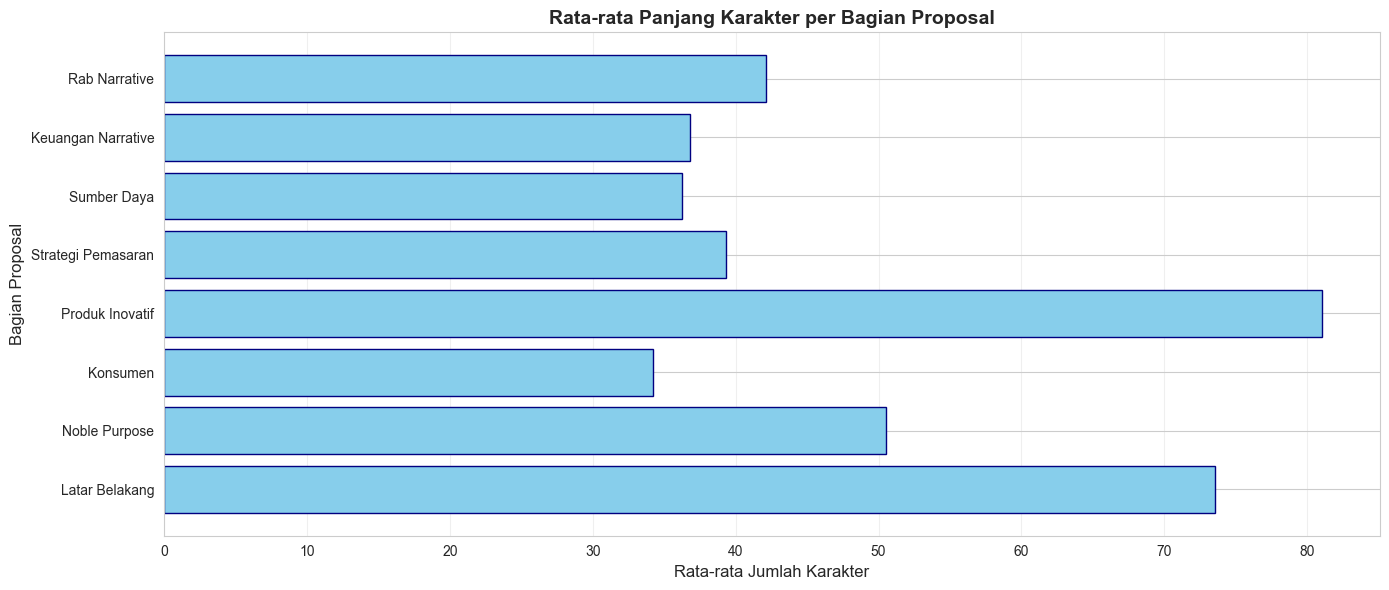

In [ ]:
plt.figure(figsize=(14, 6))
bagian_names = [
    col.replace("txt_", "").replace("_", " ").title() for col in text_columns
]
avg_chars = [df[f"{col}_len_char"].mean() for col in text_columns]

plt.barh(bagian_names, avg_chars, color="skyblue", edgecolor="navy")
plt.xlabel("Rata-rata Jumlah Karakter", fontsize=12)
plt.ylabel("Bagian Proposal", fontsize=12)
plt.title(
    "Rata-rata Panjang Karakter per Bagian Proposal", fontsize=14, fontweight="bold"
)
plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

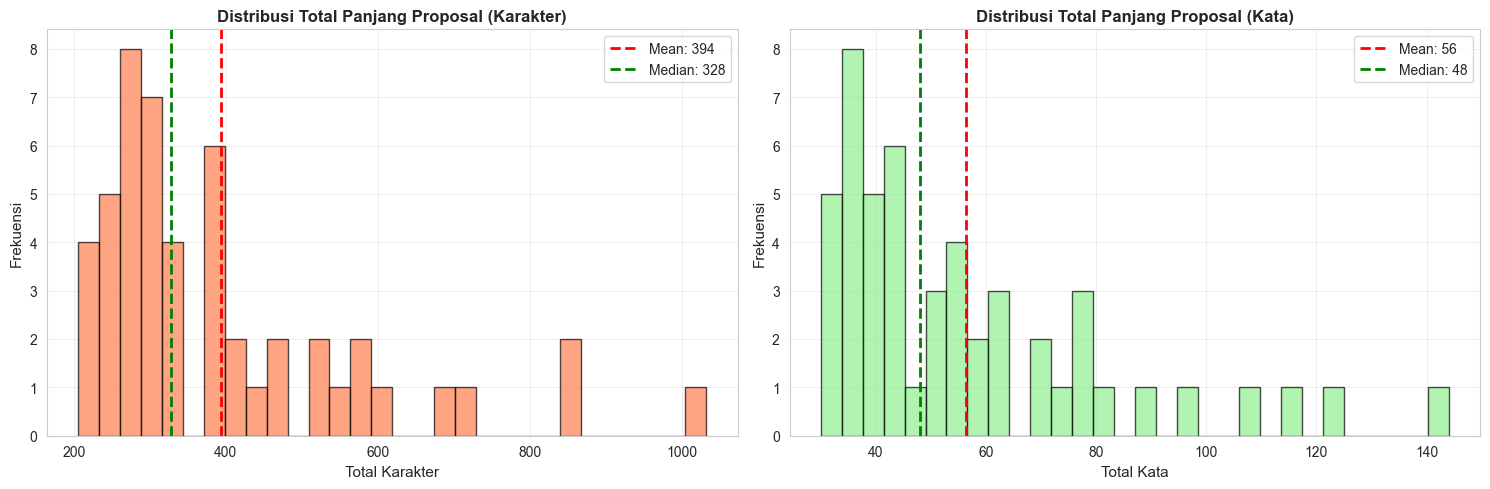

In [14]:
# Visualisasi distribusi total panjang proposal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram karakter
axes[0].hist(df["total_char"], bins=30, color="coral", edgecolor="black", alpha=0.7)
axes[0].axvline(
    df["total_char"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df['total_char'].mean():.0f}",
)
axes[0].axvline(
    df["total_char"].median(),
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Median: {df['total_char'].median():.0f}",
)
axes[0].set_xlabel("Total Karakter", fontsize=11)
axes[0].set_ylabel("Frekuensi", fontsize=11)
axes[0].set_title(
    "Distribusi Total Panjang Proposal (Karakter)", fontsize=12, fontweight="bold"
)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histogram kata
axes[1].hist(
    df["total_word"], bins=30, color="lightgreen", edgecolor="black", alpha=0.7
)
axes[1].axvline(
    df["total_word"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df['total_word'].mean():.0f}",
)
axes[1].axvline(
    df["total_word"].median(),
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Median: {df['total_word'].median():.0f}",
)
axes[1].set_xlabel("Total Kata", fontsize=11)
axes[1].set_ylabel("Frekuensi", fontsize=11)
axes[1].set_title(
    "Distribusi Total Panjang Proposal (Kata)", fontsize=12, fontweight="bold"
)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Zulfi\AppData\Local\Temp\ipykernel_13124\2982378809.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(char_data, labels=bagian_names, patch_artist=True, vert=False)
C:\Users\Zulfi\AppData\Local\Temp\ipykernel_13124\2982378809.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(word_data, labels=bagian_names, patch_artist=True, vert=False)


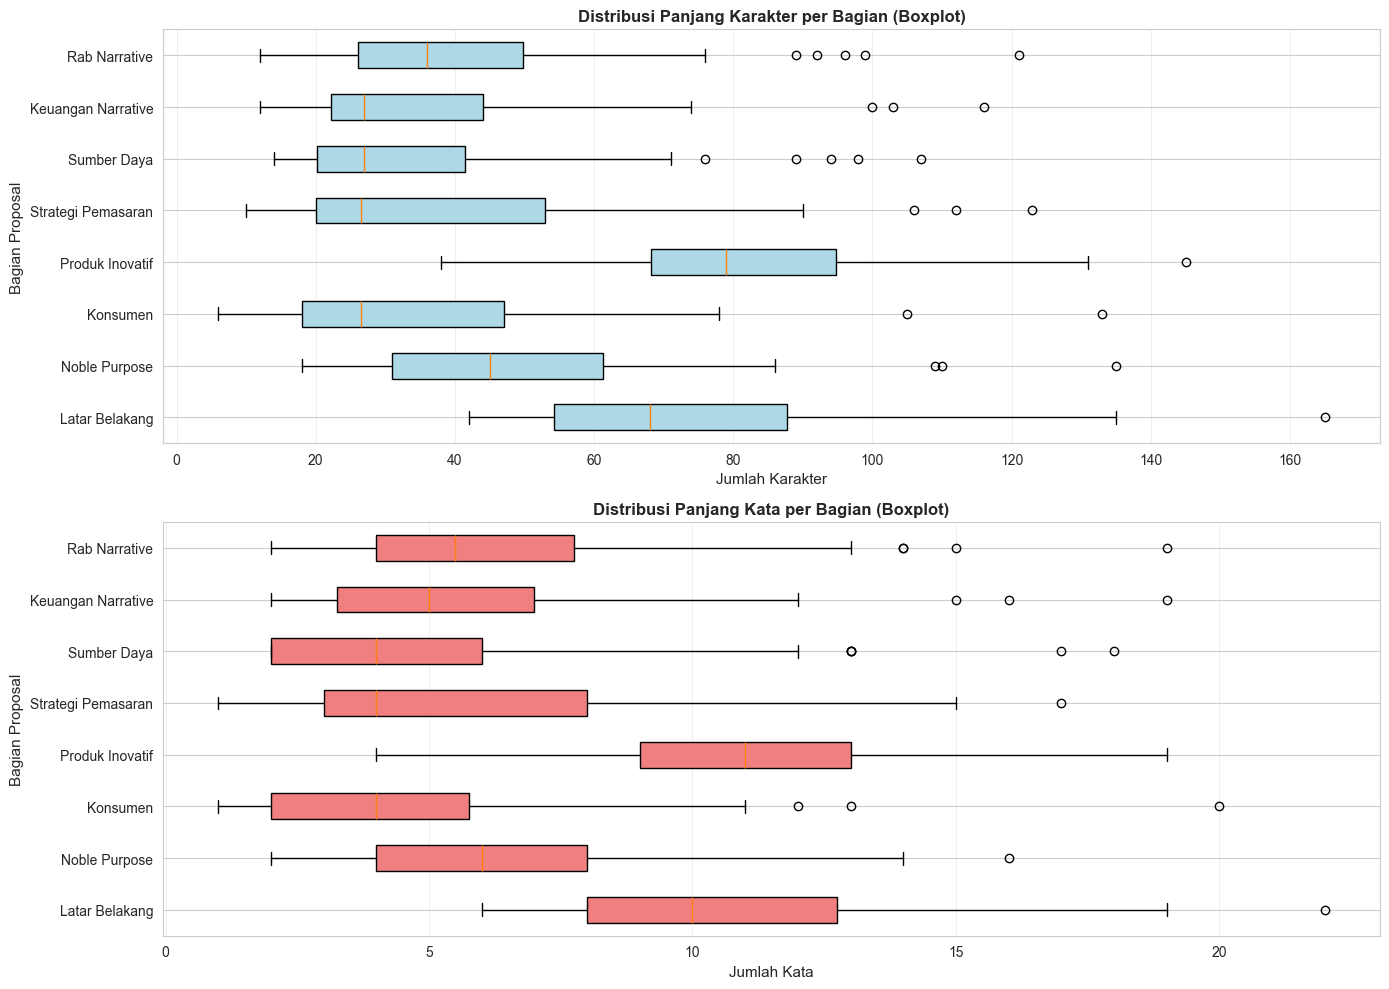

In [15]:
# Boxplot untuk melihat outliers
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Boxplot panjang karakter per bagian
char_data = [df[f"{col}_len_char"] for col in text_columns]
bp1 = axes[0].boxplot(char_data, labels=bagian_names, patch_artist=True, vert=False)
for patch in bp1["boxes"]:
    patch.set_facecolor("lightblue")
axes[0].set_xlabel("Jumlah Karakter", fontsize=11)
axes[0].set_ylabel("Bagian Proposal", fontsize=11)
axes[0].set_title(
    "Distribusi Panjang Karakter per Bagian (Boxplot)", fontsize=12, fontweight="bold"
)
axes[0].grid(axis="x", alpha=0.3)

# Boxplot panjang kata per bagian
word_data = [df[f"{col}_len_word"] for col in text_columns]
bp2 = axes[1].boxplot(word_data, labels=bagian_names, patch_artist=True, vert=False)
for patch in bp2["boxes"]:
    patch.set_facecolor("lightcoral")
axes[1].set_xlabel("Jumlah Kata", fontsize=11)
axes[1].set_ylabel("Bagian Proposal", fontsize=11)
axes[1].set_title(
    "Distribusi Panjang Kata per Bagian (Boxplot)", fontsize=12, fontweight="bold"
)
axes[1].grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Export dataset dengan semua fitur baru untuk modeling
import os

output_dir = "dataset/eda_results/"
os.makedirs(output_dir, exist_ok=True)

# Kolom fitur yang akan di-export
feature_columns = [
    # Original text columns
    *text_columns,
    # Length features
    "total_char",
    "total_word",
    # Score features
    "completeness_score",
    "completeness_category",
    "depth_score",
    "quantitative_score",
    "consistency_score",
    "readiness_score",
    "readiness_category",
    # Risk indicators
    "red_flag_count",
    "red_flags",
    "risk_level",
]

# Filter kolom yang ada
available_features = [col for col in feature_columns if col in df.columns]
df_export = df[available_features].copy()

# Export
output_path = f"{output_dir}dataset_with_eda_features.csv"
df_export.to_csv(output_path, index=False)

print("=" * 70)
print("EXPORT DATASET DENGAN FITUR EDA")
print("=" * 70)
print(f"✅ File disimpan: {output_path}")
print(f"   Total rows: {len(df_export)}")
print(f"   Total columns: {len(df_export.columns)}")
print(f"   File size: {os.path.getsize(output_path) / 1024:.2f} KB")

print("\n" + "=" * 70)
print("SUMMARY STATISTIK FITUR UTAMA")
print("=" * 70)
summary_features = df_export[
    [
        "completeness_score",
        "depth_score",
        "quantitative_score",
        "consistency_score",
        "readiness_score",
    ]
].describe()
print(summary_features.round(2))

## 11. Export Dataset dengan Fitur EDA untuk Modeling

In [ ]:
# Hitung skor readiness berdasarkan weighted average
WEIGHTS = {
    "completeness": 0.35,  # 35% - Paling penting
    "depth": 0.25,  # 25%
    "quantitative": 0.20,  # 20%
    "consistency": 0.20,  # 20% - Berdasarkan variasi panjang antar bagian
}

# Skor consistency: semakin konsisten panjang antar bagian, semakin baik
word_lengths = df[[f"{col}_len_word" for col in text_columns]]
df["consistency_score"] = 100 - np.clip(
    (word_lengths.std(axis=1) / word_lengths.mean(axis=1)) * 100, 0, 100
)

# Hitung readiness score
df["readiness_score"] = (
    df["completeness_score"] * WEIGHTS["completeness"]
    + df["depth_score"] * WEIGHTS["depth"]
    + df["quantitative_score"] * WEIGHTS["quantitative"]
    + df["consistency_score"] * WEIGHTS["consistency"]
).round(2)


# Kategorisasi readiness
def categorize_readiness(score):
    if score >= 75:
        return "Siap Verifikasi"
    elif score >= 60:
        return "Perlu Minor Review"
    elif score >= 40:
        return "Perlu Major Review"
    else:
        return "Belum Siap"


df["readiness_category"] = df["readiness_score"].apply(categorize_readiness)

print("=" * 60)
print("DISTRIBUSI SKOR READINESS PROPOSAL")
print("=" * 60)
print(df["readiness_score"].describe())

readiness_counts = df["readiness_category"].value_counts()
print("\n" + "=" * 60)
print("DISTRIBUSI KATEGORI READINESS")
print("=" * 60)
for cat, count in readiness_counts.items():
    pct = (count / len(df)) * 100
    print(f"{cat:25s}: {count:3d} ({pct:5.1f}%)")

# Visualisasi comprehensive
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Histogram readiness score
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(
    df["readiness_score"], bins=25, color="steelblue", edgecolor="black", alpha=0.7
)
ax1.axvline(
    df["readiness_score"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df['readiness_score'].mean():.1f}",
)
ax1.axvline(75, color="green", linestyle="--", linewidth=2, label="Threshold: 75")
ax1.set_xlabel("Readiness Score", fontsize=10)
ax1.set_ylabel("Frekuensi", fontsize=10)
ax1.set_title("Distribusi Readiness Score", fontsize=11, fontweight="bold")
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Bar chart kategori
ax2 = fig.add_subplot(gs[0, 1])
colors_readiness = {
    "Siap Verifikasi": "green",
    "Perlu Minor Review": "yellowgreen",
    "Perlu Major Review": "orange",
    "Belum Siap": "red",
}
readiness_colors = [colors_readiness.get(x, "gray") for x in readiness_counts.index]

ax2.bar(
    range(len(readiness_counts)),
    readiness_counts.values,
    color=readiness_colors,
    edgecolor="black",
    alpha=0.7,
)
ax2.set_xticks(range(len(readiness_counts)))
ax2.set_xticklabels(readiness_counts.index, rotation=15, ha="right", fontsize=9)
ax2.set_ylabel("Jumlah Proposal", fontsize=10)
ax2.set_title("Distribusi Kategori Readiness", fontsize=11, fontweight="bold")
ax2.grid(axis="y", alpha=0.3)

for i, (count, pct) in enumerate(
    zip(readiness_counts.values, (readiness_counts.values / len(df) * 100))
):
    ax2.text(
        i,
        count + 1,
        f"{count}\n({pct:.1f}%)",
        ha="center",
        fontweight="bold",
        fontsize=9,
    )

# Plot 3: Scatter - Completeness vs Readiness
ax3 = fig.add_subplot(gs[1, 0])
scatter = ax3.scatter(
    df["completeness_score"],
    df["readiness_score"],
    c=df["red_flag_count"],
    cmap="RdYlGn_r",
    alpha=0.6,
    s=50,
    edgecolors="black",
)
ax3.set_xlabel("Completeness Score", fontsize=10)
ax3.set_ylabel("Readiness Score", fontsize=10)
ax3.set_title(
    "Completeness vs Readiness (colored by Red Flags)", fontsize=11, fontweight="bold"
)
ax3.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label("Red Flag Count", rotation=270, labelpad=15, fontsize=9)

# Plot 4: Scatter - Depth vs Readiness
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(
    df["depth_score"],
    df["readiness_score"],
    alpha=0.5,
    s=50,
    c="purple",
    edgecolors="black",
)
ax4.set_xlabel("Depth Score", fontsize=10)
ax4.set_ylabel("Readiness Score", fontsize=10)
ax4.set_title("Content Depth vs Readiness", fontsize=11, fontweight="bold")
ax4.grid(alpha=0.3)

# Plot 5: Breakdown score components (boxplot)
ax5 = fig.add_subplot(gs[2, :])
score_components = df[
    ["completeness_score", "depth_score", "quantitative_score", "consistency_score"]
].values.T
bp = ax5.boxplot(
    score_components,
    labels=["Completeness", "Depth", "Quantitative", "Consistency"],
    patch_artist=True,
    vert=True,
)

colors_box = ["lightblue", "lightcoral", "gold", "lightgreen"]
for patch, color in zip(bp["boxes"], colors_box):
    patch.set_facecolor(color)

ax5.set_ylabel("Score (%)", fontsize=10)
ax5.set_title("Distribusi Komponen Skor Readiness", fontsize=11, fontweight="bold")
ax5.grid(axis="y", alpha=0.3)
ax5.axhline(50, color="red", linestyle="--", alpha=0.3, label="Threshold: 50%")
ax5.legend()

plt.suptitle(
    "COMPREHENSIVE READINESS ANALYSIS", fontsize=15, fontweight="bold", y=0.995
)
plt.tight_layout()
plt.show()

## 10. Skor Readiness untuk Verifikasi Administratif

**Overall Score:** Kombinasi dari semua metrik untuk menentukan readiness proposal

In [ ]:
# Red flags untuk proposal bermasalah
red_flags = []

for idx, row in df.iterrows():
    flags = []

    # Flag 1: Kelengkapan rendah
    if row["completeness_score"] < 50:
        flags.append("Tidak Lengkap")

    # Flag 2: Terlalu pendek
    if row["total_word"] < 500:
        flags.append("Terlalu Pendek")

    # Flag 3: Tidak ada data kuantitatif
    if row["quantitative_score"] < 20:
        flags.append("Kurang Data Kuantitatif")

    # Flag 4: Kedalaman konten rendah
    if row["depth_score"] < 30:
        flags.append("Konten Dangkal")

    # Flag 5: Terlalu panjang (mungkin spam/copypaste)
    if row["total_word"] > df["total_word"].quantile(0.95):
        flags.append("Terlalu Panjang (Outlier)")

    red_flags.append(
        {
            "Index": idx,
            "Red Flags": ", ".join(flags) if flags else "OK",
            "Flag Count": len(flags),
        }
    )

red_flags_df = pd.DataFrame(red_flags)
df["red_flag_count"] = red_flags_df["Flag Count"].values
df["red_flags"] = red_flags_df["Red Flags"].values


# Kategori risk level
def categorize_risk(flag_count):
    if flag_count == 0:
        return "Low Risk"
    elif flag_count <= 2:
        return "Medium Risk"
    else:
        return "High Risk"


df["risk_level"] = df["red_flag_count"].apply(categorize_risk)

risk_counts = df["risk_level"].value_counts()
print("=" * 60)
print("DISTRIBUSI RISK LEVEL PROPOSAL")
print("=" * 60)
for risk, count in risk_counts.items():
    pct = (count / len(df)) * 100
    print(f"{risk:15s}: {count:3d} ({pct:5.1f}%)")

# Proposal dengan high risk
high_risk_df = df[df["risk_level"] == "High Risk"][
    [
        "red_flag_count",
        "red_flags",
        "completeness_score",
        "depth_score",
        "quantitative_score",
        "total_word",
    ]
]

print("\n" + "=" * 80)
print("PROPOSAL HIGH RISK (Top 10)")
print("=" * 80)
if len(high_risk_df) > 0:
    print(high_risk_df.head(10).to_string())
else:
    print("✅ Tidak ada proposal high risk!")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart risk level
colors_risk = {"Low Risk": "green", "Medium Risk": "orange", "High Risk": "red"}
risk_colors = [colors_risk.get(x, "gray") for x in risk_counts.index]

axes[0].bar(
    range(len(risk_counts)),
    risk_counts.values,
    color=risk_colors,
    edgecolor="black",
    alpha=0.7,
)
axes[0].set_xticks(range(len(risk_counts)))
axes[0].set_xticklabels(risk_counts.index)
axes[0].set_ylabel("Jumlah Proposal", fontsize=11)
axes[0].set_title("Distribusi Risk Level Proposal", fontsize=12, fontweight="bold")
axes[0].grid(axis="y", alpha=0.3)

for i, (count, pct) in enumerate(
    zip(risk_counts.values, (risk_counts.values / len(df) * 100))
):
    axes[0].text(i, count + 1, f"{count}\n({pct:.1f}%)", ha="center", fontweight="bold")

# Distribusi jumlah red flags
flag_distribution = df["red_flag_count"].value_counts().sort_index()
axes[1].bar(
    flag_distribution.index,
    flag_distribution.values,
    color="coral",
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_xlabel("Jumlah Red Flags", fontsize=11)
axes[1].set_ylabel("Jumlah Proposal", fontsize=11)
axes[1].set_title(
    "Distribusi Jumlah Red Flags per Proposal", fontsize=12, fontweight="bold"
)
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Identifikasi Proposal Bermasalah (Outliers & Red Flags)

**Untuk Verifikasi:** Deteksi proposal yang berpotensi ditolak atau perlu review manual

In [ ]:
# Korelasi panjang antar bagian
correlation_cols = [f"{col}_len_word" for col in text_columns]
correlation_matrix = df[correlation_cols].corr()

# Rename untuk readability
col_labels = [
    col.replace("txt_", "").replace("_len_word", "").replace("_", " ").title()
    for col in text_columns
]
correlation_matrix.index = col_labels
correlation_matrix.columns = col_labels

print("=" * 60)
print("KORELASI PANJANG KATA ANTAR BAGIAN PROPOSAL")
print("=" * 60)
print(correlation_matrix.round(2))

# Visualisasi heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title(
    "Korelasi Panjang Konten Antar Bagian Proposal",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Bagian Proposal", fontsize=11)
plt.ylabel("Bagian Proposal", fontsize=11)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Insight: pasangan bagian dengan korelasi tertinggi dan terendah
corr_pairs = []
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        corr_pairs.append(
            {
                "Bagian 1": correlation_matrix.index[i],
                "Bagian 2": correlation_matrix.columns[j],
                "Korelasi": correlation_matrix.iloc[i, j],
            }
        )

corr_pairs_df = pd.DataFrame(corr_pairs).sort_values("Korelasi", ascending=False)

print("\n" + "=" * 70)
print("TOP 5 PASANGAN BAGIAN DENGAN KORELASI TERTINGGI")
print("=" * 70)
print(corr_pairs_df.head().to_string(index=False))

print("\n" + "=" * 70)
print("TOP 5 PASANGAN BAGIAN DENGAN KORELASI TERENDAH")
print("=" * 70)
print(corr_pairs_df.tail().to_string(index=False))

## 8. Korelasi Antar Bagian Proposal

**Insight:** Proposal yang baik biasanya konsisten di semua bagian

In [ ]:
# Deteksi konten numerik
import re

numeric_data = []

for col in text_columns:
    # Deteksi berbagai jenis data numerik
    df[f"{col}_has_numbers"] = (
        df[col].fillna("").astype(str).apply(lambda x: bool(re.search(r"\d", x)))
    )
    df[f"{col}_has_percentage"] = (
        df[col].fillna("").astype(str).apply(lambda x: bool(re.search(r"\d+%", x)))
    )
    df[f"{col}_has_currency"] = (
        df[col]
        .fillna("")
        .astype(str)
        .apply(lambda x: bool(re.search(r"Rp\.?\s?\d+", x, re.IGNORECASE)))
    )
    df[f"{col}_number_count"] = (
        df[col].fillna("").astype(str).apply(lambda x: len(re.findall(r"\d+", x)))
    )

    numeric_data.append(
        {
            "Bagian": col.replace("txt_", "").replace("_", " ").title(),
            "Contains Numbers (%)": df[f"{col}_has_numbers"].mean() * 100,
            "Contains Percentage (%)": df[f"{col}_has_percentage"].mean() * 100,
            "Contains Currency (%)": df[f"{col}_has_currency"].mean() * 100,
            "Avg Number Count": df[f"{col}_number_count"].mean(),
        }
    )

numeric_df = pd.DataFrame(numeric_data)
print("=" * 80)
print("ANALISIS KONTEN NUMERIK PER BAGIAN")
print("=" * 80)
print(numeric_df.to_string(index=False))

# Skor keberadaan data kuantitatif per proposal
df["quantitative_score"] = 0

for col in text_columns:
    # Skor berdasarkan ada tidaknya data numerik
    has_data = (
        df[f"{col}_has_numbers"].astype(int)
        + df[f"{col}_has_percentage"].astype(int)
        + df[f"{col}_has_currency"].astype(int)
    )
    df["quantitative_score"] += np.clip(has_data / 3, 0, 1)

# Convert ke persentase
df["quantitative_score"] = (df["quantitative_score"] / len(text_columns)) * 100

print("\n" + "=" * 60)
print("DISTRIBUSI SKOR DATA KUANTITATIF")
print("=" * 60)
print(df["quantitative_score"].describe())

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(
    df["quantitative_score"], bins=20, color="gold", edgecolor="black", alpha=0.7
)
axes[0].axvline(
    df["quantitative_score"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df['quantitative_score'].mean():.1f}%",
)
axes[0].set_xlabel("Skor Data Kuantitatif (%)", fontsize=11)
axes[0].set_ylabel("Frekuensi", fontsize=11)
axes[0].set_title(
    "Distribusi Skor Data Kuantitatif dalam Proposal", fontsize=12, fontweight="bold"
)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Heatmap: bagian mana yang paling banyak mengandung data numerik
numeric_presence = numeric_df[
    [
        "Bagian",
        "Contains Numbers (%)",
        "Contains Percentage (%)",
        "Contains Currency (%)",
    ]
].set_index("Bagian")
im = axes[1].imshow(numeric_presence.values.T, cmap="YlOrRd", aspect="auto")
axes[1].set_xticks(range(len(numeric_presence)))
axes[1].set_xticklabels(numeric_presence.index, rotation=45, ha="right", fontsize=9)
axes[1].set_yticks(range(3))
axes[1].set_yticklabels(["Numbers", "Percentage", "Currency"], fontsize=10)
axes[1].set_title("Keberadaan Data Numerik per Bagian", fontsize=12, fontweight="bold")

# Tambahkan colorbar
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label("Persentase (%)", rotation=270, labelpad=20)

# Tambahkan nilai di cell
for i in range(3):
    for j in range(len(numeric_presence)):
        text = axes[1].text(
            j,
            i,
            f"{numeric_presence.values.T[i, j]:.0f}%",
            ha="center",
            va="center",
            color="black",
            fontsize=8,
            fontweight="bold",
        )

plt.tight_layout()
plt.show()

## 7. Analisis Konten Numerik & Data Kuantitatif

**Untuk Verifikasi:** Proposal kredibel harus memiliki data kuantitatif (angka, proyeksi, budget)

In [ ]:
# Analisis kedalaman berdasarkan jumlah kalimat
depth_data = []

for col in text_columns:
    # Hitung jumlah kalimat (approximation)
    df[f"{col}_sentences"] = (
        df[col]
        .fillna("")
        .astype(str)
        .apply(lambda x: x.count(".") + x.count("!") + x.count("?"))
    )

    # Rata-rata panjang kalimat (words per sentence)
    df[f"{col}_avg_sentence_len"] = df.apply(
        lambda row: row[f"{col}_len_word"] / max(row[f"{col}_sentences"], 1), axis=1
    )

    depth_data.append(
        {
            "Bagian": col.replace("txt_", "").replace("_", " ").title(),
            "Avg Sentences": df[f"{col}_sentences"].mean(),
            "Avg Words per Sentence": df[f"{col}_avg_sentence_len"].mean(),
            "Avg Total Words": df[f"{col}_len_word"].mean(),
        }
    )

depth_df = pd.DataFrame(depth_data)
print("=" * 80)
print("ANALISIS KEDALAMAN KONTEN PER BAGIAN")
print("=" * 80)
print(depth_df.to_string(index=False))

# Skor kedalaman: kombinasi jumlah kata dan struktur kalimat
df["depth_score"] = 0

for col in text_columns:
    # Normalisasi: skor tinggi jika banyak kata DAN kalimat terstruktur baik
    word_score = np.clip(df[f"{col}_len_word"] / 200, 0, 1)  # Max 200 kata = skor 1
    sentence_quality = np.clip(
        df[f"{col}_avg_sentence_len"] / 20, 0, 1
    )  # Optimal ~20 words/sentence

    df["depth_score"] += word_score * 0.7 + sentence_quality * 0.3

# Convert ke persentase
df["depth_score"] = (df["depth_score"] / len(text_columns)) * 100

print("\n" + "=" * 60)
print("DISTRIBUSI SKOR KEDALAMAN KONTEN")
print("=" * 60)
print(df["depth_score"].describe())

# Visualisasi
plt.figure(figsize=(14, 6))
plt.scatter(
    df["total_word"], df["depth_score"], alpha=0.5, s=50, c="purple", edgecolors="black"
)
plt.xlabel("Total Kata dalam Proposal", fontsize=11)
plt.ylabel("Skor Kedalaman Konten (%)", fontsize=11)
plt.title("Hubungan Total Kata dengan Kedalaman Konten", fontsize=13, fontweight="bold")
plt.axhline(50, color="red", linestyle="--", alpha=0.5, label="Threshold: 50%")
plt.axvline(
    df["total_word"].median(),
    color="green",
    linestyle="--",
    alpha=0.5,
    label=f"Median Words: {df['total_word'].median():.0f}",
)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Analisis Kedalaman Konten (Content Depth Analysis)

**Untuk Verifikasi:** Proposal yang baik harus memiliki konten yang detail dan mendalam

In [ ]:
# Skor kelengkapan keseluruhan per proposal
df["completeness_score"] = 0

for col in text_columns:
    # Nilai 1 jika bagian ada dan memadai (>50 karakter)
    df["completeness_score"] += (
        (df[col].notna()) & (df[f"{col}_len_char"] >= 50)
    ).astype(int)

# Convert ke persentase
df["completeness_score"] = (df["completeness_score"] / len(text_columns)) * 100

print("=" * 60)
print("DISTRIBUSI SKOR KELENGKAPAN PROPOSAL")
print("=" * 60)
print(df["completeness_score"].describe())


# Kategorisasi
def categorize_completeness(score):
    if score >= 90:
        return "Sangat Lengkap (≥90%)"
    elif score >= 70:
        return "Lengkap (70-89%)"
    elif score >= 50:
        return "Cukup Lengkap (50-69%)"
    else:
        return "Tidak Lengkap (<50%)"


df["completeness_category"] = df["completeness_score"].apply(categorize_completeness)

category_counts = df["completeness_category"].value_counts()
print("\n" + "=" * 60)
print("DISTRIBUSI KATEGORI KELENGKAPAN")
print("=" * 60)
for cat, count in category_counts.items():
    pct = (count / len(df)) * 100
    print(f"{cat:30s}: {count:3d} ({pct:5.1f}%)")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(
    df["completeness_score"], bins=20, color="teal", edgecolor="black", alpha=0.7
)
axes[0].axvline(
    df["completeness_score"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df['completeness_score'].mean():.1f}%",
)
axes[0].axvline(70, color="orange", linestyle="--", linewidth=2, label="Threshold: 70%")
axes[0].set_xlabel("Skor Kelengkapan (%)", fontsize=11)
axes[0].set_ylabel("Frekuensi", fontsize=11)
axes[0].set_title(
    "Distribusi Skor Kelengkapan Proposal", fontsize=12, fontweight="bold"
)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Bar chart kategori
colors_cat = {
    "Sangat Lengkap (≥90%)": "darkgreen",
    "Lengkap (70-89%)": "green",
    "Cukup Lengkap (50-69%)": "orange",
    "Tidak Lengkap (<50%)": "red",
}
cat_colors = [colors_cat.get(x, "gray") for x in category_counts.index]

axes[1].bar(
    range(len(category_counts)),
    category_counts.values,
    color=cat_colors,
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_xticks(range(len(category_counts)))
axes[1].set_xticklabels(category_counts.index, rotation=15, ha="right")
axes[1].set_ylabel("Jumlah Proposal", fontsize=11)
axes[1].set_title("Distribusi Kategori Kelengkapan", fontsize=12, fontweight="bold")
axes[1].grid(axis="y", alpha=0.3)

for i, (count, pct) in enumerate(
    zip(category_counts.values, (category_counts.values / len(df) * 100))
):
    axes[1].text(i, count + 1, f"{count}\n({pct:.1f}%)", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
# Analisis kelengkapan: bagian mana yang sering kosong atau terlalu pendek
completeness_data = []

for col in text_columns:
    empty_count = (df[col].isna() | (df[col].astype(str).str.strip() == "")).sum()
    too_short_count = (df[f"{col}_len_char"] < 50).sum()  # Threshold: 50 karakter

    completeness_data.append(
        {
            "Bagian": col.replace("txt_", "").replace("_", " ").title(),
            "Empty (%)": (empty_count / len(df)) * 100,
            "Too Short < 50 char (%)": (too_short_count / len(df)) * 100,
            "Complete & Adequate (%)": 100
            - ((empty_count + too_short_count) / len(df)) * 100,
        }
    )

completeness_df = pd.DataFrame(completeness_data).sort_values(
    "Complete & Adequate (%)", ascending=True
)

print("=" * 70)
print("ANALISIS KELENGKAPAN PROPOSAL PER BAGIAN")
print("=" * 70)
print(completeness_df.to_string(index=False))

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(completeness_df))
width = 0.25

bars1 = ax.barh(
    x - width,
    completeness_df["Empty (%)"],
    width,
    label="Empty",
    color="red",
    alpha=0.7,
)
bars2 = ax.barh(
    x,
    completeness_df["Too Short < 50 char (%)"],
    width,
    label="Too Short",
    color="orange",
    alpha=0.7,
)
bars3 = ax.barh(
    x + width,
    completeness_df["Complete & Adequate (%)"],
    width,
    label="Complete & Adequate",
    color="green",
    alpha=0.7,
)

ax.set_xlabel("Persentase (%)", fontsize=11)
ax.set_ylabel("Bagian Proposal", fontsize=11)
ax.set_title("Tingkat Kelengkapan per Bagian Proposal", fontsize=13, fontweight="bold")
ax.set_yticks(x)
ax.set_yticklabels(completeness_df["Bagian"])
ax.legend(loc="best")
ax.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Analisis Kelengkapan Proposal (Completeness Analysis)

**Untuk Verifikasi Administratif:** Kelengkapan dokumen adalah kriteria pertama dalam penilaian

## 12. Summary & Key Insights untuk Verifikasi Administratif

### 📊 **EDA Findings:**

#### **1. Kelengkapan Proposal**
- **Sangat Lengkap (≥90%)**: Proposal dengan semua bagian terisi memadai
- **Lengkap (70-89%)**: Mayoritas bagian lengkap, beberapa perlu perbaikan minor
- **Cukup Lengkap (50-69%)**: Banyak bagian kosong atau terlalu pendek
- **Tidak Lengkap (<50%)**: Proposal tidak memenuhi syarat administratif

#### **2. Kedalaman Konten**
- Proposal dengan skor depth tinggi memiliki penjelasan detail dan terstruktur
- Kalimat optimal: 15-25 kata per kalimat
- Proposal dangkal (<30%) cenderung hanya bullet points tanpa penjelasan

#### **3. Data Kuantitatif**
- Proposal kredibel harus memiliki: angka, persentase, proyeksi, budget
- Bagian yang paling memerlukan data numerik: RAB, Keuangan, Target Market
- Proposal tanpa data kuantitatif (<20%) sulit diverifikasi

#### **4. Korelasi Antar Bagian**
- Korelasi tinggi: proposal konsisten di semua bagian
- Korelasi rendah: ketidakseimbangan (satu bagian detail, lainnya kosong)
- Pattern konsistensi dapat memprediksi kualitas keseluruhan

#### **5. Red Flags Utama**
- **Tidak Lengkap**: Missing atau terlalu pendek
- **Terlalu Pendek**: < 500 kata total
- **Kurang Data Kuantitatif**: Tidak ada angka/proyeksi
- **Konten Dangkal**: Hanya definisi tanpa penjelasan
- **Terlalu Panjang**: Outlier (mungkin copypaste)

#### **6. Readiness Score Distribution**
- **Siap Verifikasi (≥75%)**: Bisa langsung diproses
- **Perlu Minor Review (60-74%)**: Perbaikan kecil
- **Perlu Major Review (40-59%)**: Revisi signifikan
- **Belum Siap (<40%)**: Ditolak atau minta resubmit

### 🎯 **Rekomendasi untuk Sistem Verifikasi:**

1. **Automasi Screening Awal**
   - Filter proposal dengan completeness_score < 50%
   - Flag proposal dengan red_flag_count > 2
   - Auto-reject jika total_word < 300

2. **Prioritas Review Manual**
   - High priority: readiness_score 60-75% (borderline cases)
   - Medium priority: completeness tinggi tapi depth rendah
   - Low priority: readiness_score > 75% (hanya verifikasi cepat)

3. **Kriteria Penerimaan**
   - Minimum completeness: 70%
   - Minimum depth: 40%
   - Minimum quantitative: 30%
   - Minimum readiness: 60%

4. **Feedback untuk Pengusul**
   - Berikan specific red flags yang ditemukan
   - Highlight bagian yang kosong atau kurang detail
   - Saran perbaikan berdasarkan skor components

### 📁 **Output Files:**
- `dataset/eda_results/dataset_with_eda_features.csv` - Dataset lengkap dengan fitur EDA

### 🚀 **Next Steps:**
1. Feature Engineering untuk IndoBERT (text preprocessing)
2. Training model klasifikasi proposal (Lolos/Tidak Lolos)
3. Build recommendation system untuk feedback otomatis
4. Develop scoring algorithm untuk ranking proposal